In [ ]:
## Create patched images for editing

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import torch

sys.path.insert(0, 'src')
from utils.visualizations import show_image_rows
from utils import ensure_dir

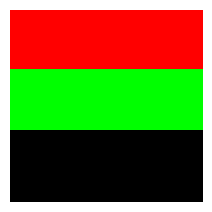

(<Figure size 250x250 with 1 Axes>, <AxesSubplot:>)

In [20]:
def create_patched_images(colors: list,
                          image_size: tuple=(32, 32),
                          color_dict: dict=None):
    if color_dict is None:
        color_dict = {
            'Bl': np.array([0, 0, 0], dtype=np.float32),
            'R': np.array([1, 0, 0], dtype=np.float32),
            'G': np.array([0, 1, 0], dtype=np.float32)
        }
    # Obtain # rows and columns
    n_rows = len(colors)
    n_cols = len(colors[0])
    for row in colors:
        assert len(row) == n_cols
        
    # Obtain patch height and width
    image_height, image_width = image_size
    patch_height = image_height // n_rows
    patch_width = image_width // n_cols
    
    remainder_height = image_height % n_rows
    remainder_width = image_width % n_rows
    
    image = np.zeros((3, image_height, image_width))
    
    for row_idx in range(n_rows):
        # Obtain patch start and end idxs
        row_start = row_idx * patch_height
        if row_idx < n_rows - 1:
            row_end = (row_idx + 1) * patch_height
        else:
            row_end = image_height

        for col_idx in range(n_cols):
            col_start = col_idx * patch_width
            if col_idx < n_cols - 1:
                col_end = (col_idx + 1) * patch_width
            else:
                col_end = image_width
                
            # print("({}, {}) -> ({}-{}, {}-{})".format(row_idx, col_idx, row_start, row_end, col_start, col_end))
            
            # Obtain patch color
            patch_color_str = colors[row_idx][col_idx]
            try:
                patch_color = color_dict[patch_color_str]
            except:
                raise ValueError("Color {} not found in dict. Available colors are {}".format(patch_color_str, color_dict.keys()))
            # Create patch
            patch = np.expand_dims(np.expand_dims(patch_color, axis=1), axis=1)
            patch = np.repeat(patch, row_end - row_start, axis=2)
            patch = np.repeat(patch, col_end - col_start, axis=1)
            # Put patch in image
            image[:, col_start:col_end, row_start:row_end] = patch
            

    return image

colors = [['R', 'G', 'Bl']]
image = create_patched_images(
    colors=colors,
    image_size=(32,32))
    
show_image_rows([[image]])
        
                          

(8, 3, 32, 32)
saved patches to saved/edit_data/2_Spurious_MNIST/patches/patches.pt


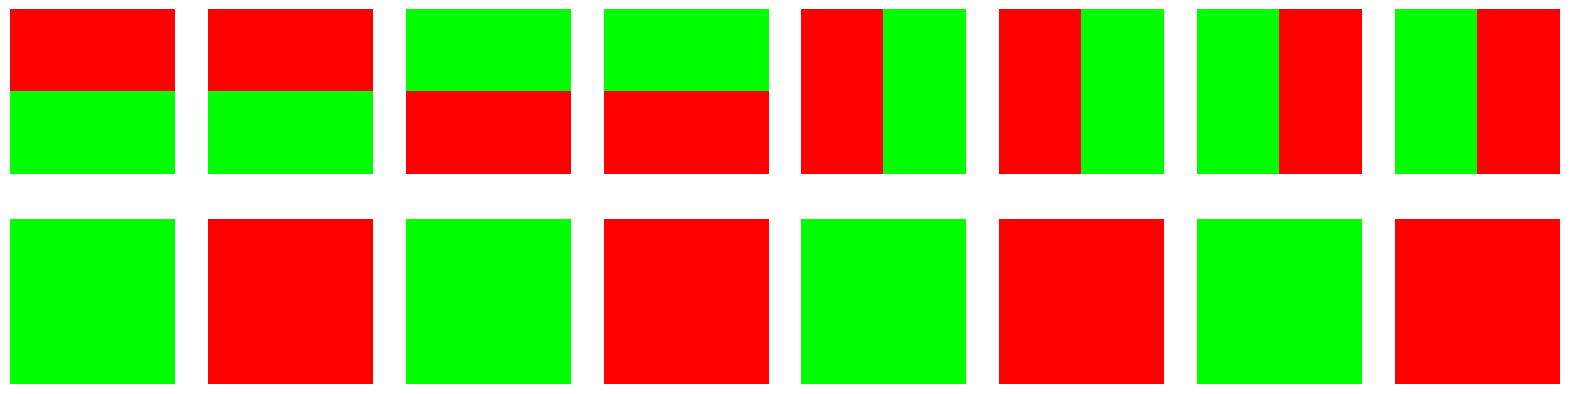

(<Figure size 2000x500 with 16 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
       dtype=object))

In [31]:
# Create different types of keys, values, masks and save edit data

save_dir = os.path.join('saved', 'edit_data', '2_Spurious_MNIST', 'patches')
ensure_dir(save_dir)

image_size = (32, 32)
# keys_colors = [
#     [['R', 'G', 'Bl']],
#     [['R', 'G', 'Bl']],
#     [['G', 'R', 'Bl']],
#     [['G', 'R', 'Bl']],
# ]
# values_colors = [
#     [['R', 'R', 'Bl']],
#     [['G', 'G', 'Bl']],
#     [['R', 'R', 'Bl']],
#     [['G', 'G', 'Bl']]
# ]

keys_colors = [
    [['R', 'G']],
    [['R', 'G']],
    [['G', 'R']],
    [['G', 'R']],
    [['R'], ['G']],
    [['R'], ['G']],
    [['G'], ['R']],
    [['G'], ['R']]
]
values_colors = [
    [['G']],
    [['R']],
    [['G']],
    [['R']],
    [['G']],
    [['R']],
    [['G']],
    [['R']]
]
keys = []
values = []
masks = []
for key_color, value_color in zip(keys_colors, values_colors):
    key_image = create_patched_images(
        colors=key_color,
        image_size=image_size)
    
    value_image = create_patched_images(
        colors=value_color,
        image_size=image_size)
    
    keys.append(key_image)
    values.append(value_image)
    masks.append(np.ones_like(key_image))
    
keys = np.stack(keys, axis=0)
values = np.stack(values, axis=0)
masks = np.stack(masks, axis=0)

print(keys.shape)
edit_data = {
    'keys': keys,
    'values': values,
    'masks': masks
}

patches_save_path = os.path.join(save_dir, 'patches.pt')

torch.save(edit_data, patches_save_path)
print("saved patches to {}".format(patches_save_path))

show_image_rows(
    [keys, values])



In [26]:
a = torch.load('saved/edit_data/2_Spurious_MNIST/hold_out_50_copy/test_hold_out_50_eac.pt')
print(a.keys())
print(a['keys'].shape, a['keys'])

dict_keys(['keys', 'values', 'labels', 'test_set_idxs', 'masks'])
(500, 3, 28, 28) [[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0.